# Loading Wine Recognition Dataset

Firstly I will import datasets from sklearn.

In [1]:
from sklearn import datasets

Then from the sklearn datasets I will load the 'wine' dataset and get its full description.

In [2]:
wine_data = datasets.load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Visualize and Preprocess Data

I will now check the shapes of the 'data' and target' fields

In [3]:
X = wine_data['data']
y = wine_data['target']

print('data.shape\t',X.shape,
      '\ntarget.shape \t',y.shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


With this it is confirmed that there are 178 samples (rows) and 13 feaures (columns)
I will now build a pandas DataFrame, to hold the data so that we can visualize the dataset into a tabular form.

In [4]:
import numpy as np
import pandas as pd

datawine = pd.DataFrame(data= np.c_[X,y],columns= wine_data['feature_names'] + ['target'])
datawine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


With this DataFrame I can check for any missing values.

In [5]:
datawine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

This confirms that there are no missing values and categorical data
The final step to data preprocessing is Feature Scaling. This is done by importing StandardScaler from sklearn.preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()
X= st_x.fit_transform(X)

# Split Data For Training & Testing

To train and test our model effectively, we must first separate the data into a training set, which we will feed to our model along with the training labels. The model will then be tested on the 'test' data after it has been trained to determine its real-world applicability.

The train test split() method in Scikit-learn comes in handy here. test size specifies how much data is set aside for testing. We want to train our model on enough data to make good predictions, but we also need enough test data to see if we've overfitted the model. Therefore I will choose to test with 20% of the data. This means 80% of data will used for training.

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42 #I chose 42 for random_state as is the most common number used for random_state
)

print(len(train_data),' samples in training data\n',
      len(test_data),' samples in test data\n', )

142  samples in training data
 36  samples in test data



# Train PCA model on train subset

Next, I will train a PCA model on the train subset and reduce the number of coordinates to 2. PCA can be imported from sklearn.decomposition. PCA is a dimensionality reduction technique that is commonly used in data preprocessing and feature extraction.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data)

# K-Means Clustering with n_clusters = number of unique class labels

I will import the KMeans class from the scikit-learn library's cluster module. I will set the number of clusters to equal the number of unqiue class labels. This means that the number of clusters should be 3. Random state is set to 42 for reproductability. These will be the only parameters that will change in the K-means model. I will then fit this model into the training data.

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(np.unique(train_labels)), random_state=42)
kmeans.fit(train_data)

KMeans(n_clusters=3, random_state=42)

The kmeans.predict() method is used to predict the clusters of the test data points. The resulting cluster labels are stored in cluster_labels. A cluster composition table is created showing the number of samples in each class that are assigned to each cluster. The table is stored in a pandas DataFrame called table_df. Then a scatter plot of the first two principal components of the transformed data is created, with the points colored by their predicted cluster assignments.

Table for KMeans clustering with 3 clusters
         Cluster 1  Cluster 2  Cluster 3
Class 0       14.0        0.0        0.0
Class 1        0.0        1.0       13.0
Class 2        0.0        8.0        0.0


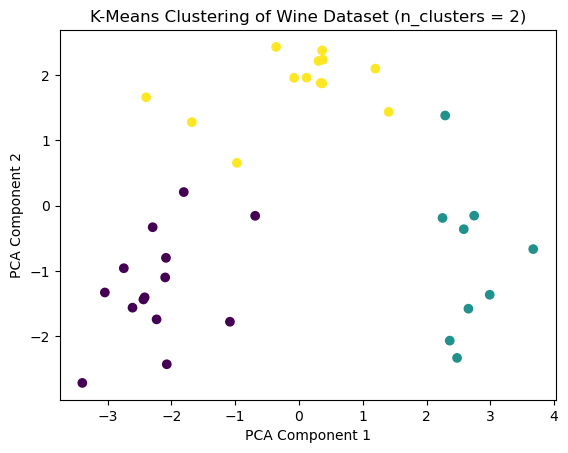

In [10]:
import matplotlib.pyplot as plt
cluster_labels4 = kmeans.predict(test_data)
table = np.zeros((len(np.unique(test_labels)), len(np.unique(cluster_labels4))))
for i, label in enumerate(np.unique(test_labels)):
    for j, cluster_label in enumerate(np.unique(cluster_labels4)):
        table[i, j] = np.sum((test_labels == label) & (cluster_labels4 == cluster_label))

table_df = pd.DataFrame(table, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'], index=['Class 0', 'Class 1', 'Class 2'])
print('Table for KMeans clustering with', len(np.unique(train_labels)), 'clusters')
print(table_df)
plt.figure(1)
plt.scatter(pca.transform(test_data)[:, 0], pca.transform(test_data)[:, 1], c=cluster_labels4)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f"K-Means Clustering of Wine Dataset (n_clusters = 2)")
plt.show()

Class 0: There are 14 samples that belong to Class 0, and all of them are assigned to Cluster 1. This means that the KMeans algorithm was able to correctly identify all the samples in Class 0 as belonging to a single cluster (Cluster 1).

Class 1: There are 14 samples that belong to Class 1, and 13 of them are assigned to Cluster 3. There is 1 sample assigned to Cluster 2. This suggests that the KMeans algorithm was not able to clearly separate samples in Class 1 into a distinct single cluster, with some samples being assigned to Cluster 3 and others being assigned to Cluster 2.

Class 2: There are 8 samples that belong to Class 2, and all of them are assigned to Cluster 2. This means that the KMeans algorithm was able to correctly identify all the samples in Class 0 as belonging to a single cluster (Cluster 1).

The scatter plot output shows a visual representation of the clusters. Each point in the plot represents a data point from the test set, and its color indicates which cluster it was assigned to by the KMeans algorithm. The axes are labeled according to the first two principal components of the dataset. Each cluster represents a group of samples that are more similar to each other than to samples from the other cluster. By looking at the plot, it is quite visible enough that there are three distinct clusters.

# K-Means Clustering with n_clusters = 5

I will do the same procedure but this time I will increase the number of clusters by 2 it to see the difference in results. This means that the number of clusters should be 5.

In [11]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit(train_data)

KMeans(n_clusters=5, random_state=42)

Table for KMeans clustering with 5 clusters
         Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Class 0       13.0        0.0        0.0        1.0        0.0
Class 1        0.0        7.0        0.0        6.0        1.0
Class 2        0.0        0.0        8.0        0.0        0.0


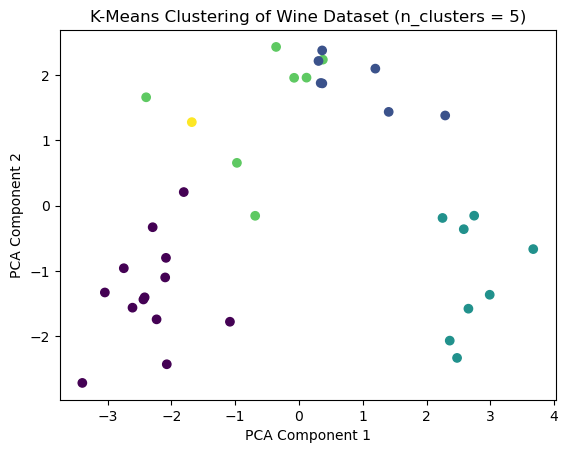

In [12]:
cluster_labels5 = kmeans2.predict(test_data)
table = np.zeros((len(np.unique(test_labels)), len(np.unique(cluster_labels5))))
for i, label in enumerate(np.unique(test_labels)):
    for j, cluster_label in enumerate(np.unique(cluster_labels5)):
        table[i, j] = np.sum((test_labels == label) & (cluster_labels5 == cluster_label))

table_df = pd.DataFrame(table, columns=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], index=['Class 0', 'Class 1', 'Class 2'])
print('Table for KMeans clustering with', 5, 'clusters')
print(table_df)
                           
plt.figure(2)
plt.scatter(pca.transform(test_data)[:, 0], pca.transform(test_data)[:, 1], c=cluster_labels5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f"K-Means Clustering of Wine Dataset (n_clusters = 5)")
plt.show()

Class 0: There are 14 samples that belong to Class 0, and all of them are assigned to Cluster 1, except one which is assigned to Cluster 4. This means that the KMeans algorithm was able to correctly identify almost all the samples in Class 0 as belonging to a single cluster (Cluster 1).

Class 1: There are 14 samples that belong to Class 1, and 7 of them are assigned to Cluster 1. 6 of them are assigned to Cluster 4, and 1 sample is assigned to Cluster 5. This suggests that the KMeans algorithm was able to identify two distinct clusters for Class 1, with some samples being assigned to Cluster 2, others to Cluster 4 (which is not a distinct cluster), and one to Cluster 5 (number of samples in the cluster is much smaller, which makes it more difficult to draw meaningful conclusions).

Class 2: There are 8 samples that belong to Class 0, and all of them are assigned to Cluster 3 which is a distinct cluster. This means that the KMeans algorithm was able to correctly identify all the samples in Class 2 as belonging to a single cluster (Cluster 3).

The scatter plot output shows a visual representation of the clusters. Each point in the plot represents a data point from the test set, and its color indicates which cluster it was assigned to by the KMeans algorithm. The axes are labeled according to the first two principal components of the dataset. Each cluster represents a group of samples that are more similar to each other than to samples from the other cluster. By looking at the plot, it is quite visible enough that there are 5 different clusters, however there is an overlapping between 2 cluster 2 and cluster 4, and 1 cluster has only one sample.

# Agglomerative Clustering

In agglomerative clustering, there are four main types of linkage, each of which defines how the distance between two clusters is computed. The four types of linkage are:

In agglomerative clustering, the algorithm begins by computing the distance between each pair of data points. It then considers each data point as a separate cluster and merges the closest pair of clusters at each iteration. The process of merging clusters continues until all points belong to a single cluster.

Single Linkage:
Single linkage measures the distance between the two closest points in each pair of clusters. The distance between two clusters is the minimum distance between any pair of points from the two clusters. Single linkage tends to produce long, chain-like clusters, and is particularly sensitive to noise and outliers.

Complete Linkage:
Complete linkage measures the distance between the two farthest points in each pair of clusters. The distance between two clusters is the maximum distance between any pair of points from the two clusters. Complete linkage tends to produce more compact, spherical clusters, and is less sensitive to noise and outliers than single linkage.

Average Linkage:
Average linkage computes the average distance between all pairs of points in each pair of clusters. The distance between two clusters is the average distance between all pairs of points from the two clusters. Average linkage is a compromise between single and complete linkage, and tends to produce clusters that are less sensitive to noise and outliers than single linkage, while being less compact than complete linkage.

Ward Linkage:
Ward linkage is a method that seeks to minimize the variance within each cluster. It works by computing the increase in the sum of squared distances between points when two clusters are merged, and choosing the pair of clusters that results in the smallest increase in variance. Ward linkage tends to produce compact, spherical clusters of roughly equal size, and is relatively insensitive to noise and outliers.

Threshold distance refers to the distance at which the algorithm stops merging clusters. When two clusters have a distance greater than or equal to the threshold distance, they are not merged any further, and the clustering algorithm stops. The threshold distance is often used as a stopping criterion to control the number of clusters produced by the algorithm.

# Ward Linkage

I will start with finding the threshold distance for ward linkage, till the number of clusters equals to the number of unique classes (3). I will use a range of threshold distances from 5 to 8. For each combination of linkage and threshold,I will fit the clustering algorithm to the test_data and calculate the predicted cluster labels for each data point. I then calculate the number of data points in each cluster for each class label. This information is stored in a pandas DataFrame called cluster_counts_df.

In [13]:
from sklearn.cluster import AgglomerativeClustering
for linkage in ['ward']:
    for threshold in range(5, 9):
        agg_cluster = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=threshold)
        agg_cluster.fit(test_data)
        clust_labels_pred = agg_cluster.labels_
        cluster_labels3 = set(clust_labels_pred)
        clustercnt_class = {
            class_label: [np.sum((clust_labels_pred == cluster_label) & (test_labels == class_label))
                          for cluster_label in cluster_labels3]
            for class_label in set(test_labels)
        }
        # Create a pandas DataFrame from the cluster counts by class
        cluster_counts_df = pd.DataFrame(clustercnt_class)
        cluster_counts_df.columns = [f'Class {i}' for i in cluster_counts_df.columns]
        cluster_counts_df.index.name = 'Cluster'
        cluster_counts_df = cluster_counts_df.fillna(0).astype(int)

        print(f"Linkage: {linkage}")
        print(f"Threshold: {threshold}")
        print(f"Clusters: {agg_cluster.n_clusters_}")
        print("Cluster composition by class:")
        print(cluster_counts_df)

Linkage: ward
Threshold: 5
Clusters: 7
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0        4        0
1              8        0        0
2              0        8        0
3              0        0        6
4              6        0        0
5              0        2        0
6              0        0        2
Linkage: ward
Threshold: 6
Clusters: 4
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14        0        0
1              0       10        0
2              0        0        8
3              0        4        0
Linkage: ward
Threshold: 7
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       14        0
1             14        0        0
2              0        0        8
Linkage: ward
Threshold: 8
Clusters: 3
Cluster composition by class:
         Class 0  Class 

It is seen that 4 cluster composition tables are created based on the different threshold values. As the distance threshold is increasing, number of clusters is reducing, and it is seen that when the distance reaches 7, the number of clusters equals to the number of unique classes. Therefore 7 will be selected as the required threshold distance for ward linkage.

# Average Linkage

I will now find the threshold distance for average linkage, till the number of clusters equals to the number of unique classes (3). I will use a range of threshold distances from 4.5 to 4.9 with an increment of 0.1. For each combination of linkage and threshold,I will fit the clustering algorithm to the test_data and calculate the predicted cluster labels for each data point. I then calculate the number of data points in each cluster for each class label. This information is stored in a pandas DataFrame called cluster_counts_df.

In [14]:
for linkage in ['average']:
    for threshold in np.arange(4.5, 5, 0.1):
        agg_cluster = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=threshold)
        agg_cluster.fit(test_data)
        y_pred_test3 = agg_cluster.labels_
        cluster_labels3 = set(y_pred_test3)
        clustercnt_class2 = {
            class_label: [np.sum((y_pred_test3 == cluster_label) & (test_labels == class_label))
                          for cluster_label in cluster_labels3]
            for class_label in set(test_labels)
        }
        # Create a pandas DataFrame from the cluster counts by class
        cluster_counts_df = pd.DataFrame(clustercnt_class2)
        cluster_counts_df.columns = [f'Class {i}' for i in cluster_counts_df.columns]
        cluster_counts_df.index.name = 'Cluster'
        cluster_counts_df = cluster_counts_df.fillna(0).astype(int)
        
        print(f"Linkage: {linkage}")
        print(f"Threshold: {threshold}")
        print(f"Clusters: {agg_cluster.n_clusters_}")
        print("Cluster composition by class:")
        print(cluster_counts_df)

Linkage: average
Threshold: 4.5
Clusters: 5
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0        1        8
1              0       11        0
2             14        0        0
3              0        1        0
4              0        1        0
Linkage: average
Threshold: 4.6
Clusters: 5
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0        1        8
1              0       11        0
2             14        0        0
3              0        1        0
4              0        1        0
Linkage: average
Threshold: 4.699999999999999
Clusters: 4
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       12        0
1              0        1        8
2             14        0        0
3              0        1        0
Linkage: average
Threshold: 4.799999999999999
Clusters: 3
Cluste

It is seen that 5 cluster composition tables are created based on the different threshold values. As the distance threshold is increasing, number of clusters is reducing, and it is seen that when the distance reaches 4.8, the number of clusters equals to the number of unique classes. Therefore 4.8 will be selected as the required threshold distance for average linkage.

# Complete Linkage

Next I will find the threshold distance for complete linkage, till the number of clusters equals to the number of unique classes (3). I will use a range of threshold distances from 6 to 8 with an increment of 1. For each combination of linkage and threshold,I will fit the clustering algorithm to the test_data and calculate the predicted cluster labels for each data point. I then calculate the number of data points in each cluster for each class label. This information is stored in a pandas DataFrame called cluster_counts_df.

In [15]:
for linkage in ['complete']:
    for threshold in np.arange(6,9):
        agg_cluster = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=threshold)
        agg_cluster.fit(test_data)
        y_pred_test3 = agg_cluster.labels_
        cluster_labels3 = set(y_pred_test3)
        clustercnt_class3 = {
            class_label: [np.sum((y_pred_test3 == cluster_label) & (test_labels == class_label))
                          for cluster_label in cluster_labels3]
            for class_label in set(test_labels)
        }
        # Create a pandas DataFrame from the cluster counts by class
        cluster_counts_df = pd.DataFrame(clustercnt_class3)
        cluster_counts_df.columns = [f'Class {i}' for i in cluster_counts_df.columns]
        cluster_counts_df.index.name = 'Cluster'
        cluster_counts_df = cluster_counts_df.fillna(0).astype(int)

        print(f"Linkage: {linkage}")
        print(f"Threshold: {threshold}")
        print(f"Clusters: {agg_cluster.n_clusters_}")
        print("Cluster composition by class:")
        print(cluster_counts_df)

Linkage: complete
Threshold: 6
Clusters: 4
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       10        0
1              0        4        0
2             14        0        0
3              0        0        8
Linkage: complete
Threshold: 7
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       14        0
1              0        0        8
2             14        0        0
Linkage: complete
Threshold: 8
Clusters: 2
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       14        0
1              0        0        8


It is seen that 3 cluster composition tables are created based on the different threshold values. As the distance threshold is increasing, number of clusters is reducing, and it is seen that when the distance reaches 7, the number of clusters equals to the number of unique classes. Therefore 7 will be selected as the required threshold distance for complete linkage.

# Single Linkage

Next I will find the threshold distance for single linkage, till the number of clusters equals to the number of unique classes (3). I will use a range of threshold distances from 3 to 3.4 with an increment of 0.1. For each combination of linkage and threshold,I will fit the clustering algorithm to the test_data and calculate the predicted cluster labels for each data point. I then calculate the number of data points in each cluster for each class label. This information is stored in a pandas DataFrame called cluster_counts_df.

In [16]:
for linkage in ['single']:
    for threshold in np.arange(3,3.5, 0.1):
        agg_cluster = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=threshold)
        agg_cluster.fit(test_data)
        y_pred_test3 = agg_cluster.labels_
        cluster_labels3 = set(y_pred_test3)
        clustercnt_class4 = {
            class_label: [np.sum((y_pred_test3 == cluster_label) & (test_labels == class_label))
                          for cluster_label in cluster_labels3]
            for class_label in set(test_labels)
        }
        # Create a pandas DataFrame from the cluster counts by class
        cluster_counts_df = pd.DataFrame(clustercnt_class4)
        cluster_counts_df.columns = [f'Class {i}' for i in cluster_counts_df.columns]
        cluster_counts_df.index.name = 'Cluster'
        cluster_counts_df = cluster_counts_df.fillna(0).astype(int)

        print(f"Linkage: {linkage}")
        print(f"Threshold: {threshold}")
        print(f"Clusters: {agg_cluster.n_clusters_}")
        print("Cluster composition by class:")
        print(cluster_counts_df)

Linkage: single
Threshold: 3.0
Clusters: 4
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       11        0
1              0        1        8
2              0        1        0
3              0        1        0
Linkage: single
Threshold: 3.1
Clusters: 4
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       11        0
1              0        1        8
2              0        1        0
3              0        1        0
Linkage: single
Threshold: 3.2
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       12        8
1              0        1        0
2              0        1        0
Linkage: single
Threshold: 3.3000000000000003
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       12   

It is seen that 5 cluster composition tables are created based on the different threshold values. As the distance threshold is increasing, number of clusters is reducing, and it is seen that when the distance reaches 3.2, the number of clusters equals to the number of unique classes. Therefore 3.2 will be selected as the required threshold distance for single linkage.

# Combination of best threshold distance for each linkage type with plottings

I have created a linkage_threshold_dict dictionary which specifies the linkage criteria to use for the agglomerative clustering, as well as the distance threshold for each criterion (These are got from the previous steps). For each key in the dictionary, agglomerative clustering is performed using the corresponding linkage and threshold values. The Cluster composition is stored in a pandas DataFrame. Then finally, a scatter plot of the first two principal components of the data, with the points colored by their predicted cluster assignments (Done separately for each linkage type).

Linkage: ward
Threshold: 7
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       14        0
1             14        0        0
2              0        0        8


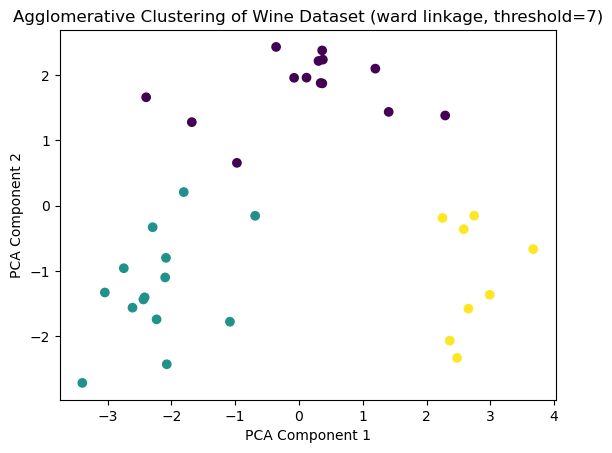

Linkage: complete
Threshold: 7
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       14        0
1              0        0        8
2             14        0        0


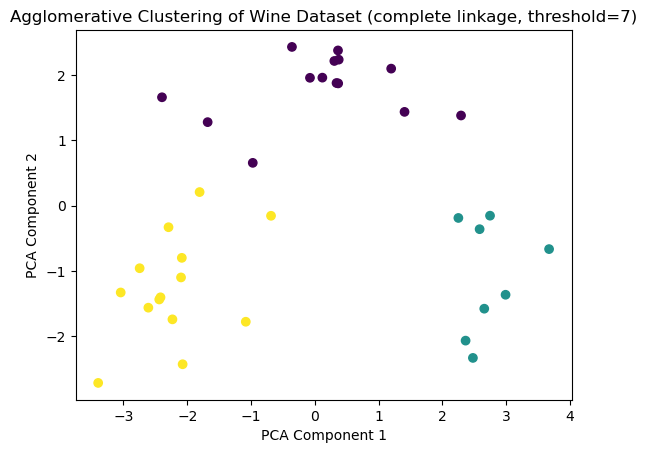

Linkage: average
Threshold: 4.8
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0              0       13        0
1              0        1        8
2             14        0        0


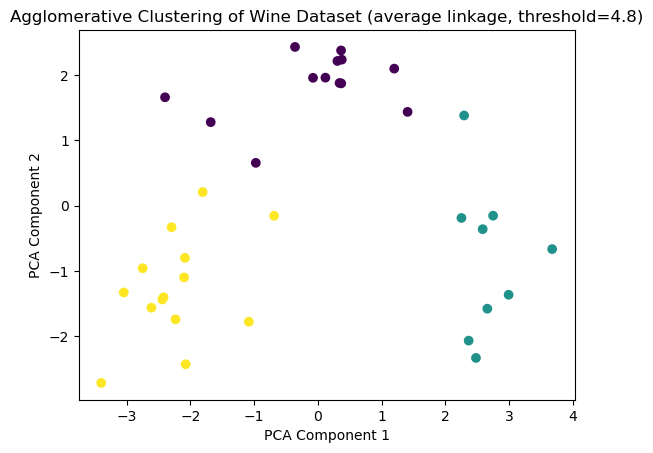

Linkage: single
Threshold: 3.2
Clusters: 3
Cluster composition by class:
         Class 0  Class 1  Class 2
Cluster                           
0             14       12        8
1              0        1        0
2              0        1        0


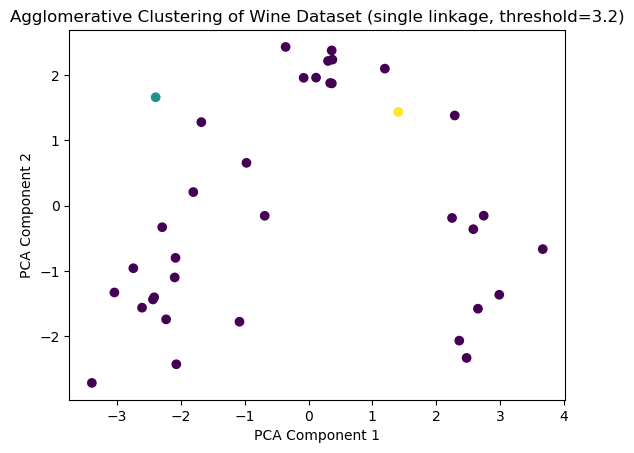

In [17]:
linkage_threshold_dict = {"ward": 7, "complete": 7, "average": 4.8, "single": 3.2}

for iter, key in enumerate(linkage_threshold_dict.keys()):
    linkage = key
    threshold = linkage_threshold_dict[key]
    agg_cluster = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=threshold)
    agg_cluster.fit(test_data)
    predicted_labels = agg_cluster.labels_
    cluster_labels3 = set(predicted_labels)
    clustercnt_class5 = {class_label: [np.sum((predicted_labels == cluster_label) & (test_labels == class_label))
                                              for cluster_label in cluster_labels3]
                                for class_label in set(test_labels)}
    
     # Create a pandas DataFrame from the cluster counts by class
    cluster_counts_df = pd.DataFrame(clustercnt_class5)
    cluster_counts_df.columns = [f'Class {i}' for i in cluster_counts_df.columns]
    cluster_counts_df.index.name = 'Cluster'
    cluster_counts_df = cluster_counts_df.fillna(0).astype(int)
    
    print(f"Linkage: {linkage}")
    print(f"Threshold: {threshold}")
    print(f"Clusters: {agg_cluster.n_clusters_}")
    print("Cluster composition by class:")
    print(cluster_counts_df)
    
    plt.figure(3+iter)
    plt.scatter(pca.transform(test_data)[:, 0], pca.transform(test_data)[:, 1], c=predicted_labels)
    plt.title(f"Agglomerative Clustering of Wine Dataset ({linkage} linkage, threshold={threshold})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()    

The cluster composition for each linkage and a scatter plot is shown. Starting with the ward linkage it is seen that there are 3 distinct clusters formed for each unique class label, and it is clearly visible in the scatter plot. Complete linkage gives a similar output as ward linkage. The threshold distance is the same and once again, three distinct clusters are formed for each unique class label. Average linkage generates 2 distinct clusers are class_0 and class_2, however class_1 had samples in two clusters. Single linkage did not perform well as one cluster had almost all samples from all 3 classes, leaving only two samples for the other two clusters. This could be due to its high sensitivity to noise and outliers.

# Conclusion

For this task, two clustering algorithms were used, K-Means and Agglomerative Clustering Algorithms. When PCA is applied with 2 components, the resulting data can be visualized in a 2-dimensional space. When the number of clusters were equal to the number of unique classes, both algorithms generated a similar output. The cluster compositions of K-Means with 3 clusters and Agglomerative Clustering of average linkage with 3 clusters give the same results. 

However in the case of K-Means, the algorithm performs better when the number of clusters equalts to the number of unique classes. When increasing the number of clusters, there was overlapping and some clusters did not have enough samples for evaluation.

In the case of Agglomerative Clustering, it is seen that for all types of linkage, increasing the threshold distance reduces the number of clusters formed. Ward linkage and complete linkage had the same threshold distance, and they perfomed the best, as 3 distinct clusters were formed for each unique class. Average linkage performed decent wih having 2 distinct clusters, with only one overlapping sample, but single linkage did not perform well. This could be possibly be due to that single linkage is highly sensitive to noise and outliers because it tends to connect points that are close together, even if they do not belong to the same cluster.

In conclusion, the choice between k-means and agglomerative clustering depends on the nature of the data and the specific goals of the analysis. The performance vary with datasets and the chosen parameters. In my task, both algorithms performed well with choosing the best parameters.